# 17. AMES HOUSING: MODEL TRAINING
---

## 1. Introduction to the Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

ames = pd.read_csv('data/Ames_Housing1_train')
holdout = pd.read_csv('data/Ames_Housing1_test')
print(ames.shape)
print(holdout.shape)
ames.head()

(2344, 80)
(586, 80)


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,80.0,10400.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,BrkFace,189.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1090.0,1090.0,GasA,TA,Y,SBrkr,1370.0,0.0,0.0,1370.0,0.0,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,479.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,MnPrv,NaN,0.0,6,2009,WD,Family,152000.0
1,60,RL,NaN,28698.0,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,2Story,5,5,1967,1967,Flat,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,PConc,TA,Gd,Gd,LwQ,249.0,ALQ,764.0,0.0,1013.0,GasA,TA,Y,SBrkr,1160.0,966.0,0.0,2126.0,0.0,1.0,2,1,3,1,TA,7,Min2,0,NaN,Attchd,1967.0,Fin,2.0,538.0,TA,TA,Y,486.0,0.0,0.0,0.0,225.0,0.0,NaN,NaN,NaN,0.0,6,2009,WD,Abnorml,185000.0
2,90,RL,70.0,9842.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1962,1962,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1224.0,0.0,0.0,1224.0,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1962.0,Unf,2.0,462.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,3,2007,WD,Normal,101800.0
3,90,RL,60.0,7200.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1949,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Fa,N,FuseF,1040.0,0.0,0.0,1040.0,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1956.0,Unf,2.0,420.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,6,2009,WD,Normal,90000.0
4,190,RM,63.0,7627.0,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,2fmCon,2Story,4,6,1920,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,Fa,TA,BrkTil,Fa,Po,No,Unf,0.0,Unf,0.0,600.0,600.0,GasA,Gd,N,SBrkr,1101.0,600.0,0.0,1701.0,0.0,0.0,2,0,4,2,Fa,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0.0,0.0,148.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,10,2009,WD,Normal,94550.0


## 2. Loading the Transformers

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin

class ContMissFiller(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        miss_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
                 'Total Bsmt SF', 'Garage Area', 'Mas Vnr Area']
        for col in miss_cols:
            df[col] = df[col].fillna(df[col].mean())        
        return df    
    
class LotFrontFiller(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        mean = df['Lot Frontage'].mean()
        df['Lot Frontage'] = df.groupby(['MS SubClass'])['Lot Frontage'].apply(
            lambda x:x.fillna(x.mean()))
        df['Lot Frontage'] = df['Lot Frontage'].fillna(mean)
        return df
    
class DiscMissFiller(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        miss_cols = ['Garage Cars', 'Bsmt Full Bath', 'Bsmt Half Bath']
        for col in miss_cols:
            df[col] = df[col].fillna(df[col].median()) 
            df[col] = df[col].astype(int)
        return df
    
class GYBFiller(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):          
        df = df.copy()
        df['Garage Yr Blt'] = ames.groupby(['MS SubClass'])['Garage Yr Blt'].apply(
            lambda x:x.fillna(x.median()))
        df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(
            df['Garage Yr Blt'].median())
        df['Garage Yr Blt'] = df['Garage Yr Blt'].astype(int)
        return df
    
class NaNExEncoder(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        likert_cols = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 
                       'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 
                       'Garage Cond', 'Pool QC']
        likert_dict = {'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, np.nan: 0}
        for col in likert_cols:
            df[col] = [likert_dict[item] for item in df[col]]
            df[col] = df[col].astype(int)
        return df
    
class Ord2Encoder(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        ord2_cols = ['Lot Shape', 'Land Slope', 'Bsmt Exposure', 'BsmtFin Type 1',             
             'BsmtFin Type 2', 'Central Air', 'Fence', 'Sale Condition']

        ord2_dict = {'Reg':8, 'IR1':6, 'IR2':4, 'IR3':2, 'Gtl':9, 'Mod':6, 'Sev':3,
                     'Gd':8, 'Av':6, 'Mn':4, 'No':2, 'GLQ':7, 'ALQ':6, 'BLQ':5, 
                     'Rec':4, 'LwQ':3, 'Unf':2, 'Y':10, 'N':5, 'GdPrv':8, 'MnPrv':6, 
                     'GdWo':4, 'MnWw':2, 'Normal':8, 'Abnorml':6, 'AdjLand':5, 'Alloca':4, 
                     'Family':3, 'Partial':2, np.nan:0
                    }
        for col2 in ord2_cols:
            df[col2] = [ord2_dict[item] for item in df[col2]]
        return df
    
class Ord3Encoder(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        ord3_cols = ['Functional', 'Garage Finish', 'Paved Drive']

        ord3_dict = {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 
                     'Sal':1, 'Fin':9, 'RFn':6, 'Unf':3, 'Y':9, 'P':6, 'N':3, np.nan:0
                    }        
        for col3 in ord3_cols:
            df[col3] = [ord3_dict[item] for item in df[col3]]
        return df
    
class NominalFiller(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        nom_cols = ['Mas Vnr Type', 'Garage Type', 'Alley', 'Misc Feature']              
        for col in nom_cols:
            df[col] = df[col].fillna('None')
        return df
    
class YrsRemodeler(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        df['Yrs_until_Remod'] = df['Year Remod/Add'] - df['Year Built']
        return df
    
class ColDropper(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        drop_cols = ['Garage Area', '1st Flr SF', 'Garage Yr Blt', 
                     'TotRms AbvGrd']
        for col in drop_cols:
            df = df.drop(col, axis=1)        
        return df
    
class DummyMaker(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        dumb_cols = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 
                     'Utilities', 'Lot Config', 'Neighborhood', 'Condition 1', 
                     'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 
                     'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 
                     'Foundation', 'Heating', 'Electrical', 'Garage Type', 
                     'Misc Feature', 'Sale Type']
        for col in dumb_cols:
            dummies = pd.get_dummies(df[col], prefix=col)
            df = pd.concat([df, dummies], axis=1)
            df = df.drop([col], axis=1)      
        return df
    
class OutlierCapper(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        cont_cols = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 
                     'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
                     '2nd Flr SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
                     'Open Porch SF', 'Low Qual Fin SF', 'Enclosed Porch', 
                     '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']
        for col in cont_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            LB = Q1 - (IQR * 1.5)
            UB = Q3 + (IQR * 1.5)
            df.loc[df[col] > UB, col] = UB
            df.loc[df[col] < LB, col] = LB
        return df
    
from sklearn.preprocessing import StandardScaler

class DfStdScaler(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self    
        
    def fit(self, df, y = None):               
        return self

    def transform(self, df):        
        df = df.copy()
        stdizer = StandardScaler()
        std_cols = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 
                     'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
                     '2nd Flr SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
                     'Open Porch SF', 'Low Qual Fin SF', 'Enclosed Porch', 
                     '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
                   'Year Remod/Add', 'Yrs_until_Remod', 'Year Built', 'Garage Yr Blt', 
                    'Yr Sold']
        df[std_cols] = stdizer.fit_transform(df[std_cols])
        return df

## 3. Preprocessing the Training Set

In [3]:
import joblib
pipeline = joblib.load('files/ames_fit_pipeline')
pipeline

Pipeline(steps=[('cont_filler1', ContMissFiller()),
                ('cont_filler2', LotFrontFiller()),
                ('disc_filler1', DiscMissFiller()),
                ('disc_filler2', GYBFiller()),
                ('likert_encoder', NaNExEncoder()),
                ('ord2_encoder', Ord2Encoder()),
                ('ord3_encoder', Ord3Encoder()),
                ('nom_filler', NominalFiller()), ('remodeler', YrsRemodeler()),
                ('dumber', DummyMaker()), ('stdizer', DfStdScaler())])

In [6]:
train = pipeline.transform(ames)
train.head()

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,...,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,0.469,0.034,8,9,7,5,0.181,-0.381,0.527,5,5,7,5,2,2,-0.979,2,-0.294,1.235,0.098,5,10,0.559,-0.781,-0.098,-0.244,0,0,2,0,3,1,5,6,8,1,5,-0.021,6,2,0.047,5,5,9,-0.754,-0.696,-0.369,-0.099,-0.287,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0.410,2.307,4,3,5,5,-0.116,-0.814,-0.575,5,5,5,7,8,3,-0.428,6,4.191,-1.279,-0.078,5,10,0.013,1.481,-0.098,1.255,0,1,2,1,3,1,5,7,6,0,0,-0.372,9,2,0.325,5,5,9,3.139,-0.696,-0.369,-0.099,3.745,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0.014,-0.036,8,9,4,5,-0.280,-1.055,-0.575,5,5,0,0,0,0,-0.979,0,-0.294,-1.279,-2.399,5,10,0.180,-0.781,-0.098,-0.533,0,0,2,0,2,2,5,6,8,0,0,-0.568,3,2,-0.033,5,5,9,-0.754,-0.696,-0.369,-0.099,-0.287,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.441,-0.364,8,9,4,5,-0.709,-1.632,-0.575,5,5,0,0,0,0,-0.979,0,-0.294,-1.279,-2.399,3,5,-0.298,-0.781,-0.098,-0.898,0,0,2,0,2,2,5,6,8,0,0,-0.802,3,2,-0.231,5,5,9,-0.754,-0.696,-0.369,-0.099,-0.287,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.305,-0.311,8,9,4,6,-1.665,-1.632,-0.575,3,5,3,2,2,2,-0.979,2,-0.294,0.105,-1.024,7,5,-0.140,0.624,-0.098,0.413,0,0,2,0,4,2,3,8,8,0,0,-0.646,0,0,-2.209,0,0,3,-0.754,-0.696,1.839,-0.099,-0.287,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']
X_train.shape, y_train.shape

((2344, 245), (2344,))

In [9]:
print('Average SalePrice:', y_train.mean())
print('STD SalePrice:', y_train.std())

Average SalePrice: 178582.20776450512
STD SalePrice: 77125.07271273082


## 4. Training K-Nearest Neighbors Regression

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

kpar = {'n_neighbors': np.arange(1, 21, 2),
       'weights': ['uniform', 'distance'],
       'algorithm': ['ball_tree', 'kd_tree', 'brute'],
       'p': [1,2]
      }
knn = KNeighborsRegressor()
kgrid = GridSearchCV(knn, kpar, n_jobs=-1)
kgrid.fit(X_train, y_train)

print('Best Parameters:', kgrid.best_params_)
print('Best Score:', kgrid.best_score_)

Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best Score: 0.8279937293729137


In [11]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7, 
                        p=1, weights='distance')
knn_mse = cross_val_score(knn, X_train, y_train, cv=10, n_jobs=-1, 
                             scoring="neg_mean_squared_error") 
knn_rmse = np.sqrt(np.absolute(knn_mse))
print('RMSE:', knn_rmse)
print('Avg_RMSE:', knn_rmse.mean())
print('Std_RMSE:', knn_rmse.std())

RMSE: [29088.18996427 39715.20110486 30646.26323561 37337.61375805
 31708.82829587 26418.76936649 34370.24756575 30015.30479347
 27421.78269525 30869.59010294]
Avg_RMSE: 31759.17908825566
Std_RMSE: 4009.6838737119883


The KNN model is performing really well. The errors are small and the std deviation of the error is not bad. Let's train Random Forest and see if we can get `feature importances`

## 5. Training Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor

ranpar = {'max_depth': [2, 4, 6, 8],
          'min_samples_leaf': [1, 2, 3, 4],
          'min_samples_split':[2, 3, 4, 5]
         }
ran = RandomForestRegressor()
rangrid = GridSearchCV(ran, ranpar, n_jobs=-1)
rangrid.fit(X_train, y_train)

print('Best Parameters:', rangrid.best_params_)
print('Best Score:', rangrid.best_score_)

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best Score: 0.8794850927031327


In [13]:
ranfo = RandomForestRegressor(max_depth=8, min_samples_leaf=1,
                            min_samples_split=4)
ranfo_mse = cross_val_score(ranfo, X_train, y_train, cv=10, n_jobs=-1, 
                             scoring="neg_mean_squared_error") 
ranfo_rmse = np.sqrt(np.absolute(ranfo_mse))
print('RMSE:', ranfo_rmse)
print('Avg_RMSE:', ranfo_rmse.mean())
print('Std_RMSE:', ranfo_rmse.std())

RMSE: [21933.07352898 31911.00894984 23455.26665795 29284.47225199
 26543.52668958 26497.65425976 33371.31888814 26938.62642072
 24464.64256314 24333.97664392]
Avg_RMSE: 26873.356685402727
Std_RMSE: 3492.981870800835


This is even better than KNN. Let's get feature importances

## 6. Random Forest Feature Importances

In [32]:
X_importances = rangrid.best_estimator_.feature_importances_
sorted(X_importances, reverse=True)[:20]

[0.6222445275058935,
 0.10405187869186204,
 0.04532417000169235,
 0.023318190858146202,
 0.019011477147479815,
 0.018691843591248654,
 0.01860596616939806,
 0.016767051476331098,
 0.014377460913811282,
 0.012408543796090207,
 0.009343208509510467,
 0.008014503087216693,
 0.006040933259729548,
 0.004806591605139351,
 0.003621954778112993,
 0.0034567076114252427,
 0.0029772866522527045,
 0.0029551690816627743,
 0.0029517540193178056,
 0.0027515204800868443]

In [37]:
ranfo_df = pd.DataFrame()
ranfo_df['X_columns'] = X_train.columns
ranfo_df['X_importances'] = X_importances
ranfo_df_sorted = ranfo_df.sort_values(by=['X_importances'], 
                                       ascending=False
                                      )
ranfo_df_sorted.head(20)

,X_columns,X_importances
4,Overall Qual,0.622
25,Gr Liv Area,0.104
22,1st Flr SF,0.045
19,Total Bsmt SF,0.023
39,Garage Cars,0.019
15,BsmtFin SF 1,0.019
23,2nd Flr SF,0.019
28,Full Bath,0.017
1,Lot Area,0.014
40,Garage Area,0.012


## 7. Visualizing Random Forest Feature Importances
#### S

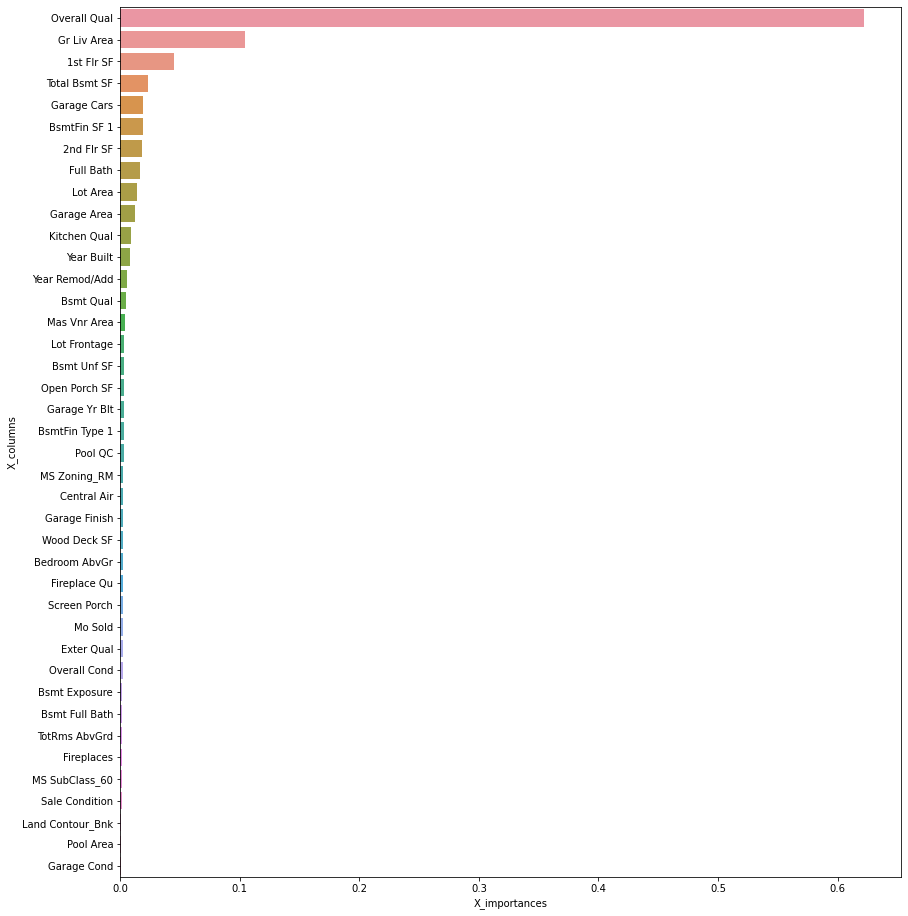

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

ranfo_df_ = ranfo_df_sorted.head(40)
plt.figure(figsize=(14,16))
ax = sns.barplot(x='X_importances', y='X_columns', data=ranfo_df_)